<a href="https://colab.research.google.com/github/Shahida-Rimu/Simulation-and-Modeling/blob/main/Ass1_Rimu_ID91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One-Sample t-Test with Python
### Student ID: 91

This notebook performs a **One-Sample t-Test** to test whether the sample mean of a dataset is significantly different from a hypothesized population mean.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Generate the dataset
np.random.seed(42)  # for reproducibility
k = 91
exam_scores = 60 + np.random.randint(0, 15, size=12) + (k % 5)
print("Exam Scores:", exam_scores)

Exam Scores: [67 64 73 75 71 68 73 65 67 70 63 67]


### Step 2: Hypotheses
- **H0:** The population mean is equal to 65.  
- **H1:** The population mean is different from 65.

In [2]:
# Step 3: Perform One-Sample t-Test
mu0 = 65  # hypothesized mean

t_stat, p_value = stats.ttest_1samp(exam_scores, mu0)
sample_mean = np.mean(exam_scores)
df = len(exam_scores) - 1

print("\n--- One-Sample t-Test Results ---")
print(f"Sample Mean     = {sample_mean:.2f}")
print(f"Hypothesized μ  = {mu0}")
print(f"t-statistic     = {t_stat:.4f}")
print(f"Degrees of freedom = {df}")
print(f"p-value         = {p_value:.4f}")


--- One-Sample t-Test Results ---
Sample Mean     = 68.58
Hypothesized μ  = 65
t-statistic     = 3.2454
Degrees of freedom = 11
p-value         = 0.0078


In [3]:
# Step 4: 95% Confidence Interval for the sample mean
conf_int = stats.t.interval(
    0.95, df=df, loc=sample_mean, scale=stats.sem(exam_scores)
)
print(f"95% Confidence Interval for mean = {conf_int}")

95% Confidence Interval for mean = (np.float64(66.1531968659404), np.float64(71.01346980072626))


In [4]:
# Step 5: Decision Rule
alpha = 0.05
if p_value < alpha:
    decision = "Reject H0 (Sample mean is significantly different from 65)"
else:
    decision = "Fail to Reject H0 (No significant difference from 65)"
print("Decision:", decision)

Decision: Reject H0 (Sample mean is significantly different from 65)


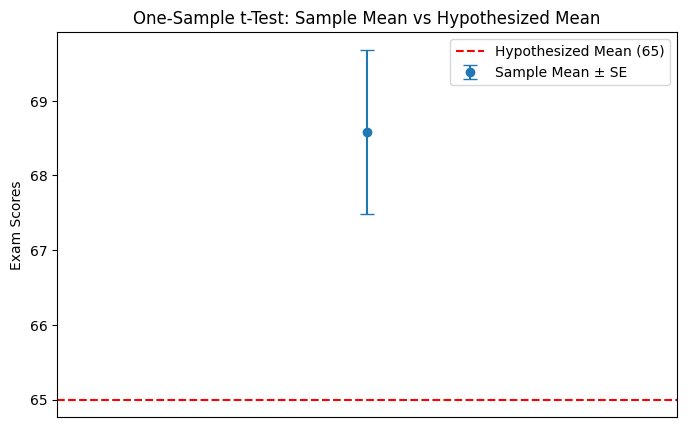

In [5]:
# Step 6: Visualization
plt.figure(figsize=(8,5))

# Plot sample mean with error bar (±1 standard error)
plt.errorbar(1, sample_mean, yerr=stats.sem(exam_scores), fmt='o', capsize=5, label="Sample Mean ± SE")

# Add hypothesized mean line
plt.axhline(y=mu0, color='r', linestyle='--', label="Hypothesized Mean (65)")

# Formatting the plot
plt.xlim(0, 2)
plt.xticks([])
plt.ylabel("Exam Scores")
plt.title("One-Sample t-Test: Sample Mean vs Hypothesized Mean")
plt.legend()
plt.show()

### Conclusion
Based on the statistical test, we made a decision whether to **reject** or **fail to reject H0** at significance level α = 0.05.  
The visualization shows the sample mean (with standard error bars) compared to the hypothesized mean (65).